In [40]:
import pandas as pd
import numpy as np

Increase the default sizes of all labels:

In [41]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'legend.fontsize': 'x-large'}
pylab.rcParams.update(params)

In [42]:
DAYS = 7
PERIOD = 24*DAYS
START = 0

In [43]:
baseline_a = np.genfromtxt('rebaseline a.csv', delimiter=',')

In [44]:
acg_a = np.genfromtxt('adv_perturbed_obs_a.csv', delimiter=',')

In [45]:
df_actions = pd.DataFrame({'Clean':baseline_a, 'Untargeted_ACG':acg_a})

In [46]:
df_actions['Optimal_BB'] = np.genfromtxt('Optimal myBB actions.csv', delimiter=',')

In [47]:
df_actions['Untargeted_BB'] = np.genfromtxt('bb results/bb obs_a.csv', delimiter=',')

Map agent actions to corresponding SoC

In [48]:
actions_to_SoC = np.linspace(-1.0,1.0,20)
df_actions.replace(dict(enumerate(actions_to_SoC)),inplace=True)

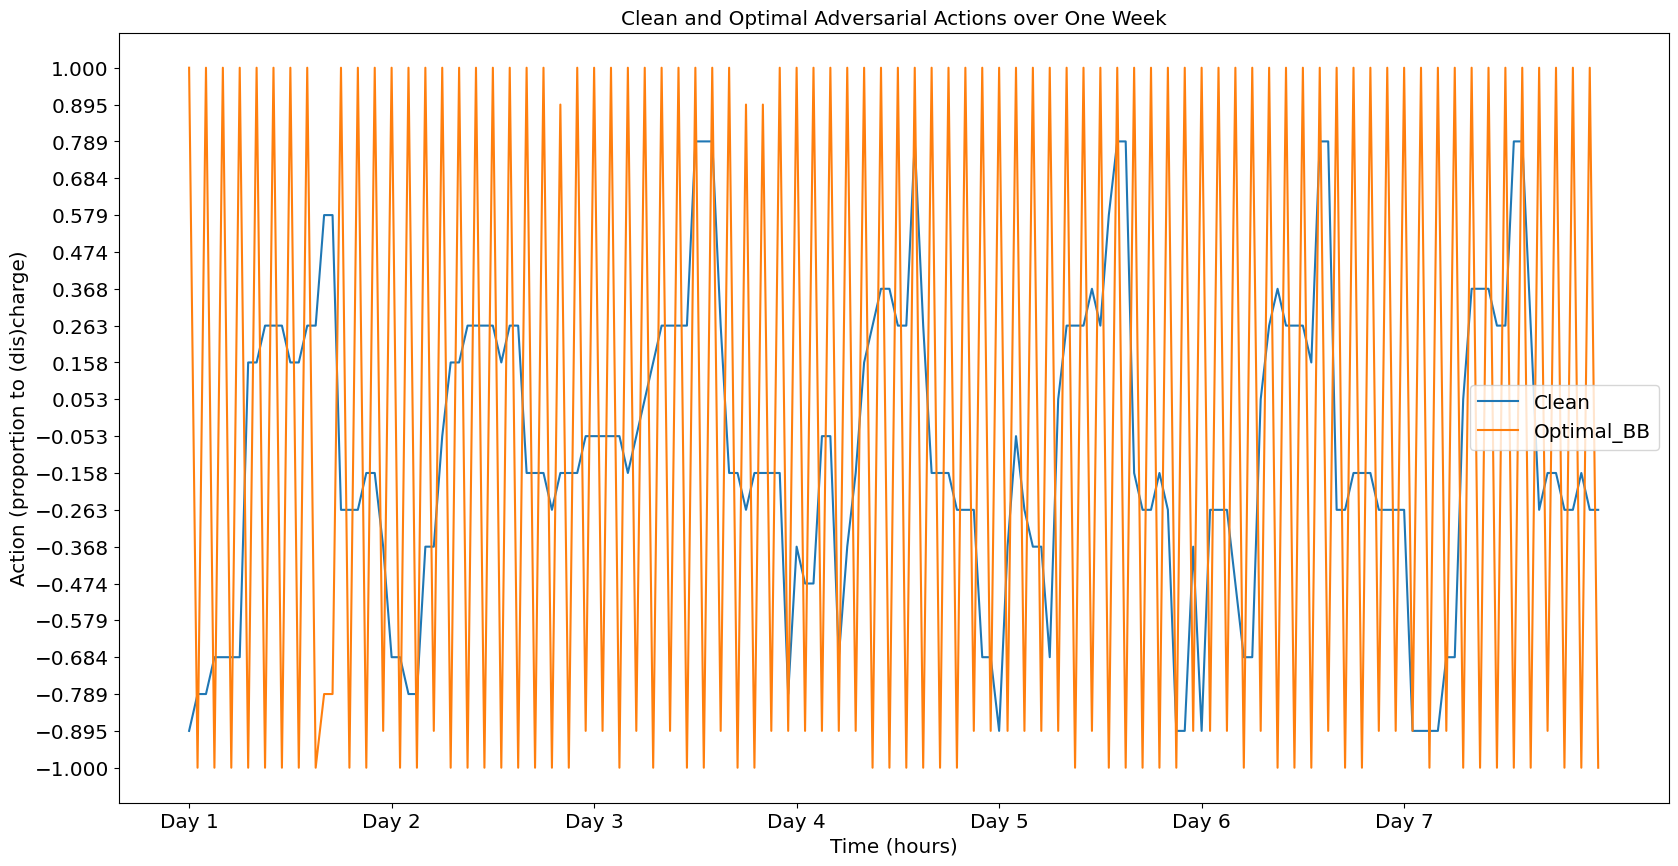

In [49]:
df_actions.iloc[START:START+PERIOD][['Clean','Optimal_BB']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Optimal Adversarial Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

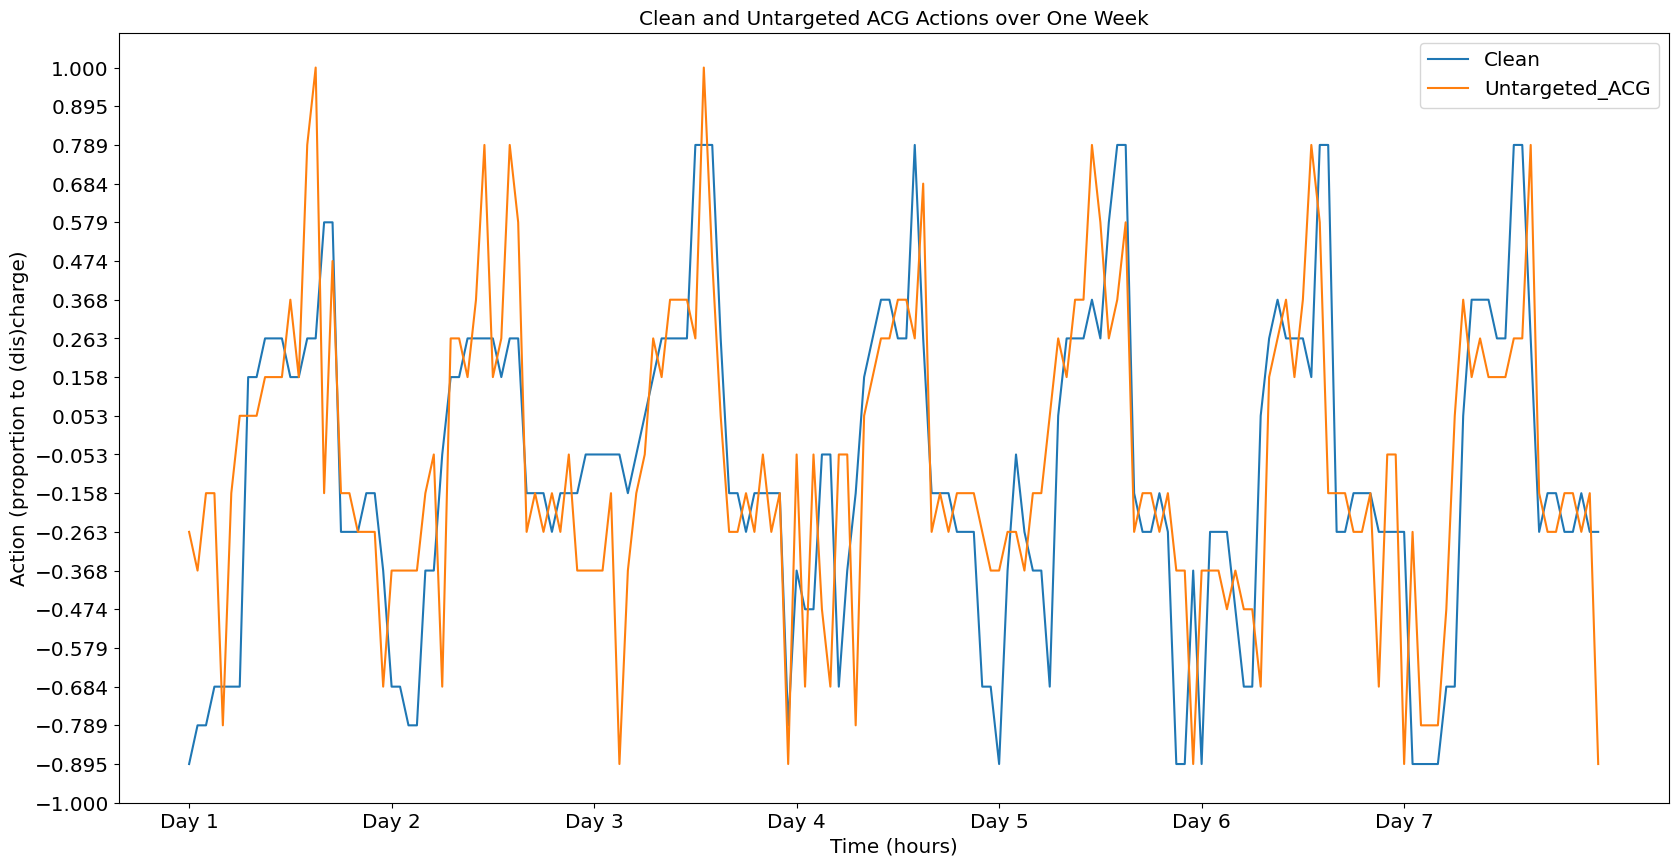

In [50]:
df_actions.iloc[START:START+PERIOD][['Clean','Untargeted_ACG']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Untargeted ACG Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

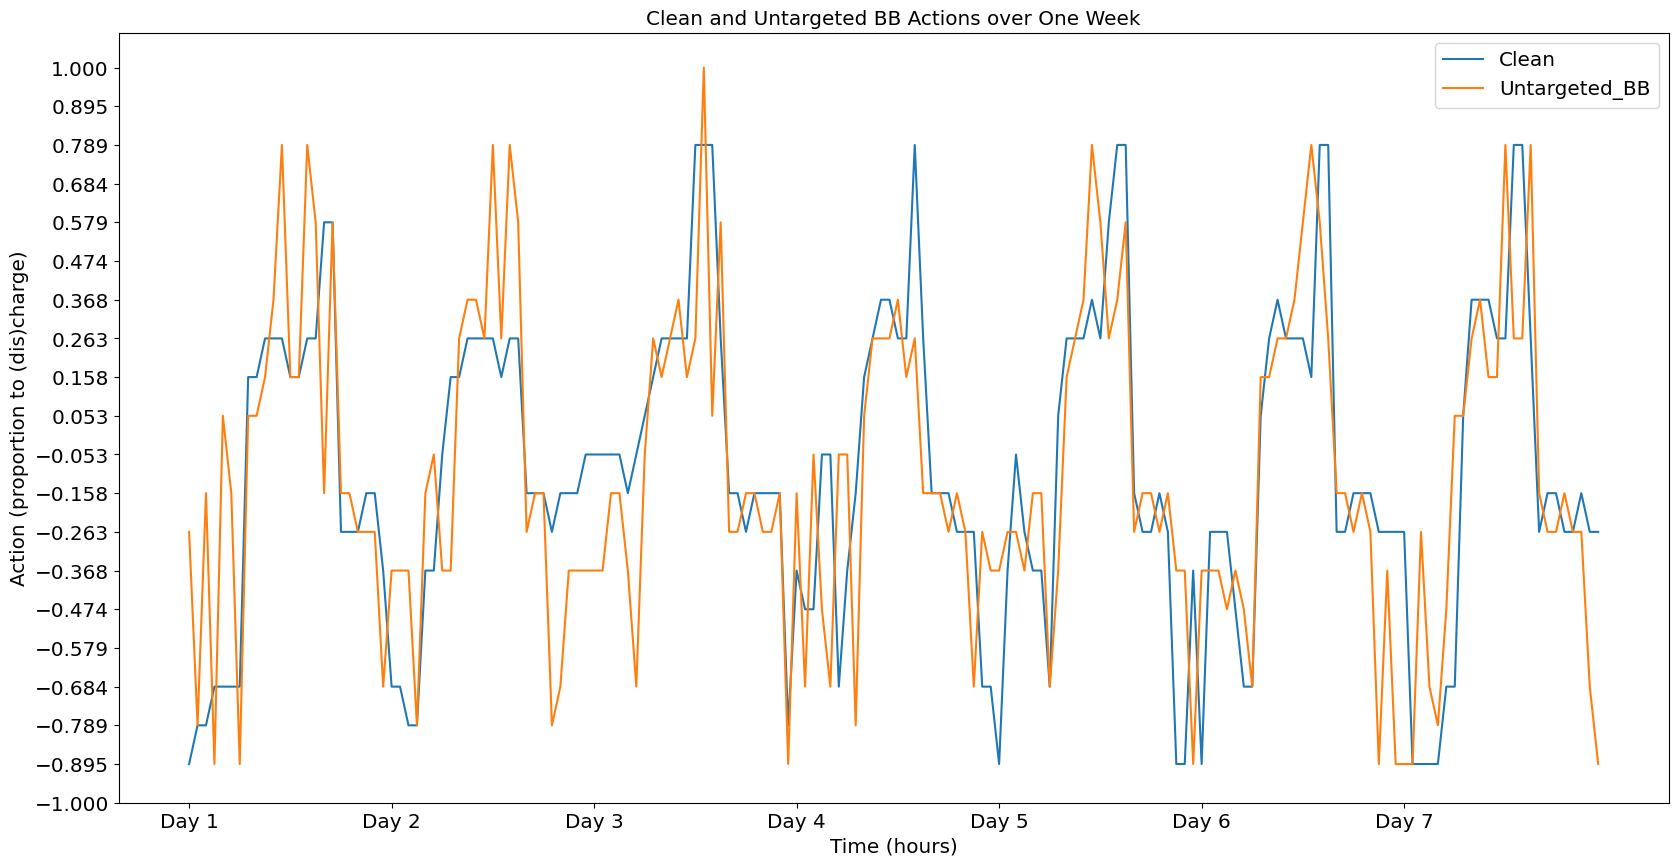

In [51]:
df_actions.iloc[START:START+PERIOD][['Clean','Untargeted_BB']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Untargeted BB Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

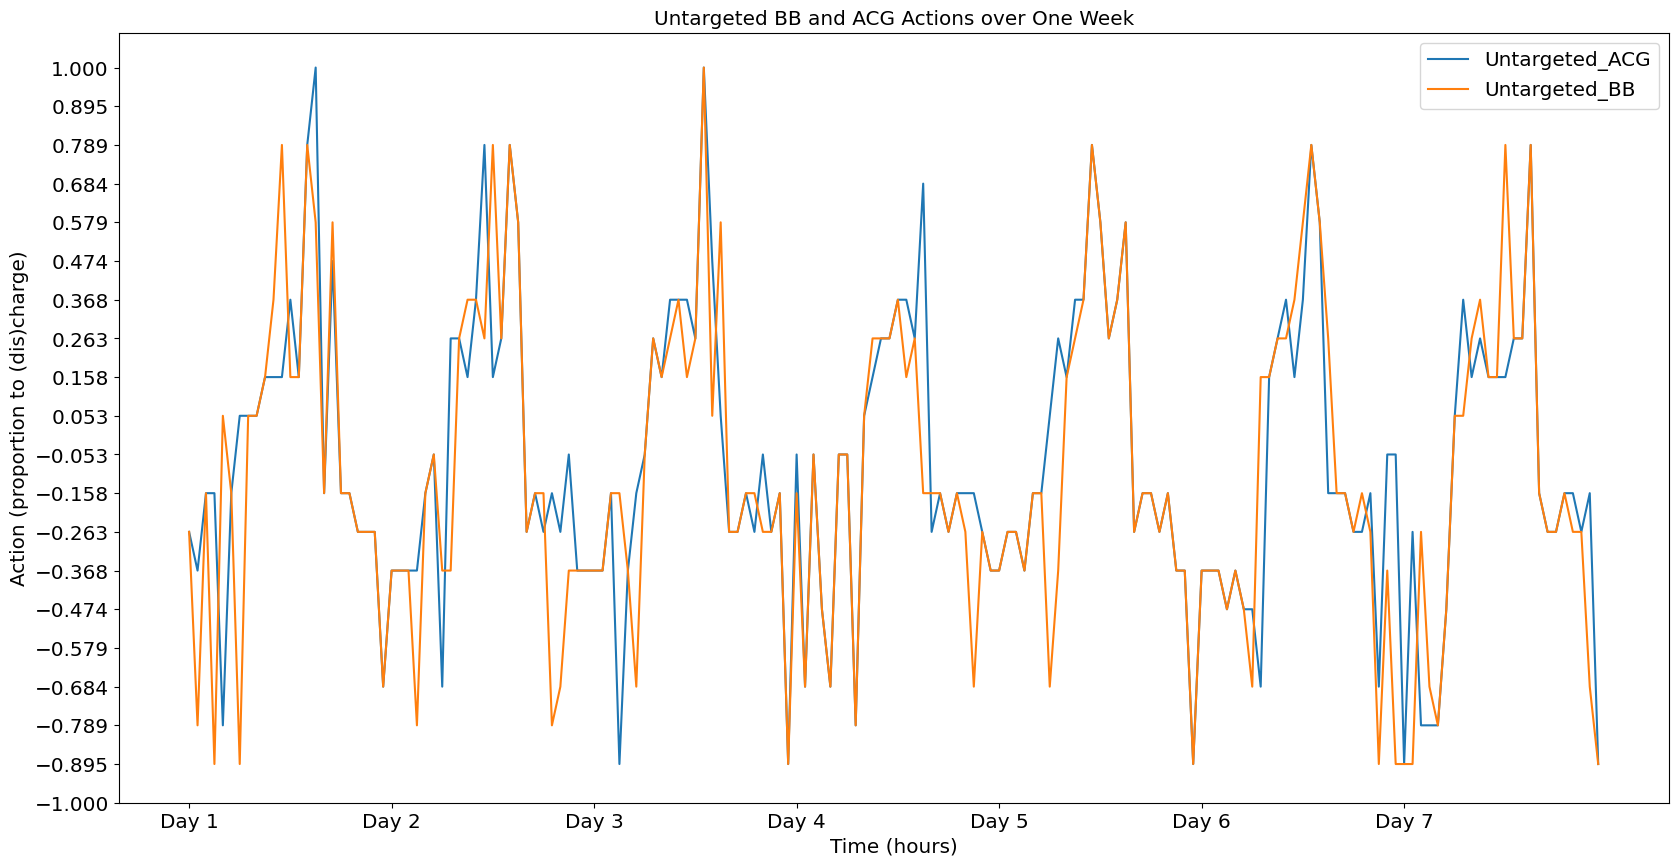

In [52]:
df_actions.iloc[START:START+PERIOD][['Untargeted_ACG','Untargeted_BB']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Untargeted BB and ACG Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])